In [221]:
#importing numpy for array related operations

import numpy as np
#Pandas for data manipulation
import pandas as pd
from matplotlib import  pyplot as plt
#importing standardscaler to bring all the values to one scale
from sklearn.preprocessing import StandardScaler
# Importing Logistic Regression to classify the target data points
from sklearn.linear_model import LogisticRegression
# Importing DecisioN Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
# Importing train_test_split to split the data into training and testing
from sklearn.model_selection import train_test_split
# Importing evaluation metrics to evaluate the model performance
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [222]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
df=pd.read_csv('/content/creditcard.csv')

In [224]:
df.shape

(284807, 31)

In [225]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [226]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [227]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [229]:
df[df['Class']==0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [230]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [231]:
df.drop_duplicates(inplace=True)

In [232]:
time_for_fraud_trans=df[df['Class']==1]['Time']

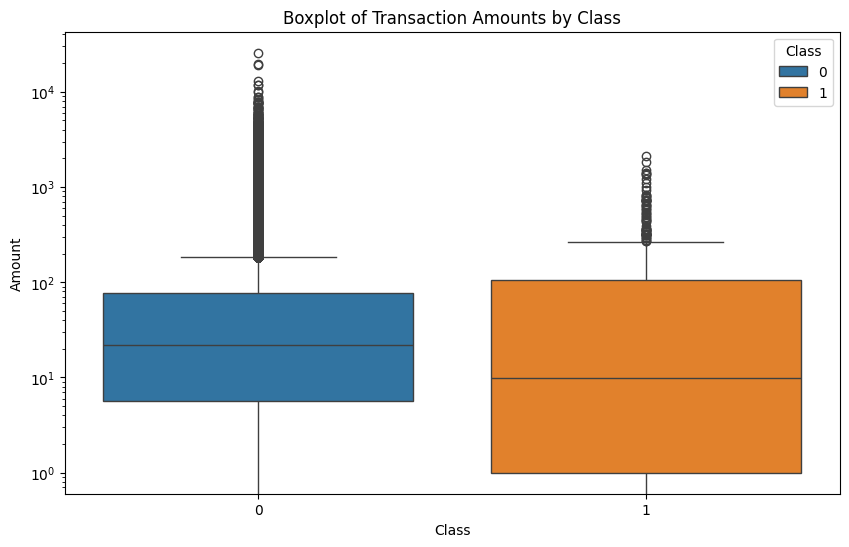

In [233]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=df,hue='Class')

plt.title('Boxplot of Transaction Amounts by Class')
plt.yscale('log')
plt.show()

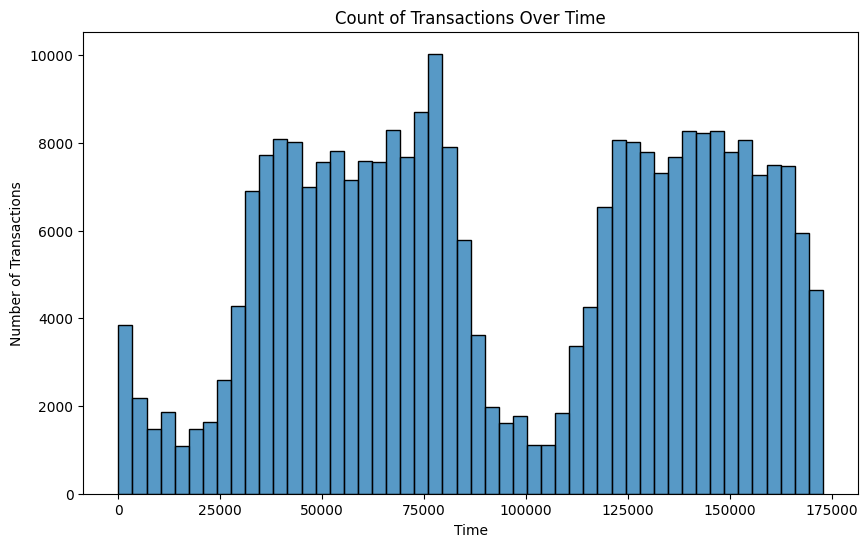

In [234]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=False)
plt.title('Count of Transactions Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.show()

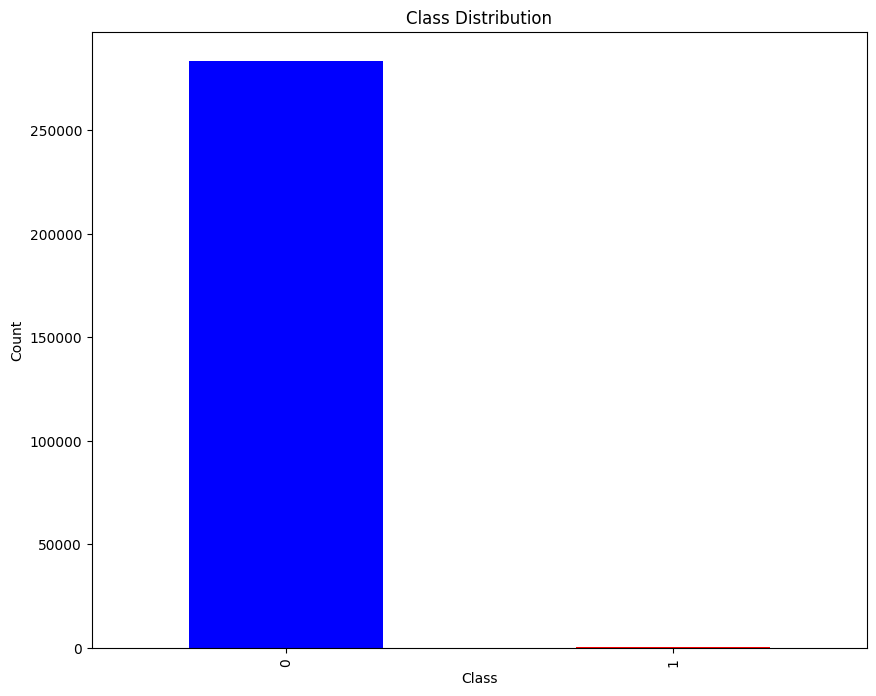

In [235]:
df['Class'].value_counts().plot(kind="bar",figsize=(10,8),color=['blue','red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [ ]:
# The above target class is imblalanced since it has majority of classes as 1 and minority of classes 0
# We can follow some sampling techniques like undersampling and oversampling to balance the data


In [236]:
non_fradulent=df[df['Class']==0]

In [237]:
fradulent=df[df['Class']==1]

In [238]:
# Balancing the data using undersampling technique
non_fradulent_sample=non_fradulent.sample(n=473)

In [239]:
transaction_data=pd.concat([fradulent,non_fradulent_sample])

In [240]:
transaction_data.drop(columns=['Time'],inplace=True)

In [241]:
transaction_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227830,-1.175162,1.369113,0.109272,1.475251,3.985758,4.281746,0.967982,0.677247,-2.022289,1.050899,...,-0.172772,-0.623689,-0.322373,0.648614,0.751219,-0.086436,-0.566562,-0.151416,0.91,0
41203,0.951448,-0.150201,1.535743,2.882924,-0.706849,1.156753,-0.679963,0.404276,0.387262,0.383077,...,-0.237569,-0.400931,-0.074169,0.037163,0.425907,-0.064499,0.049344,0.030469,60.85,0
129282,0.960715,-0.714997,0.903772,0.078287,-0.817470,0.651381,-0.655865,0.289803,0.830747,-0.395961,...,-0.107786,-0.231565,-0.038662,-0.194242,0.068807,0.961641,-0.034636,0.016216,106.04,0
107798,-4.427674,3.723065,0.968795,-1.230213,-0.218679,-0.429865,1.319085,-1.555139,3.312631,6.117960,...,-0.219311,0.083299,-0.057006,0.495461,-0.220730,-0.241239,-2.396850,-0.856532,0.99,0


<Axes: >

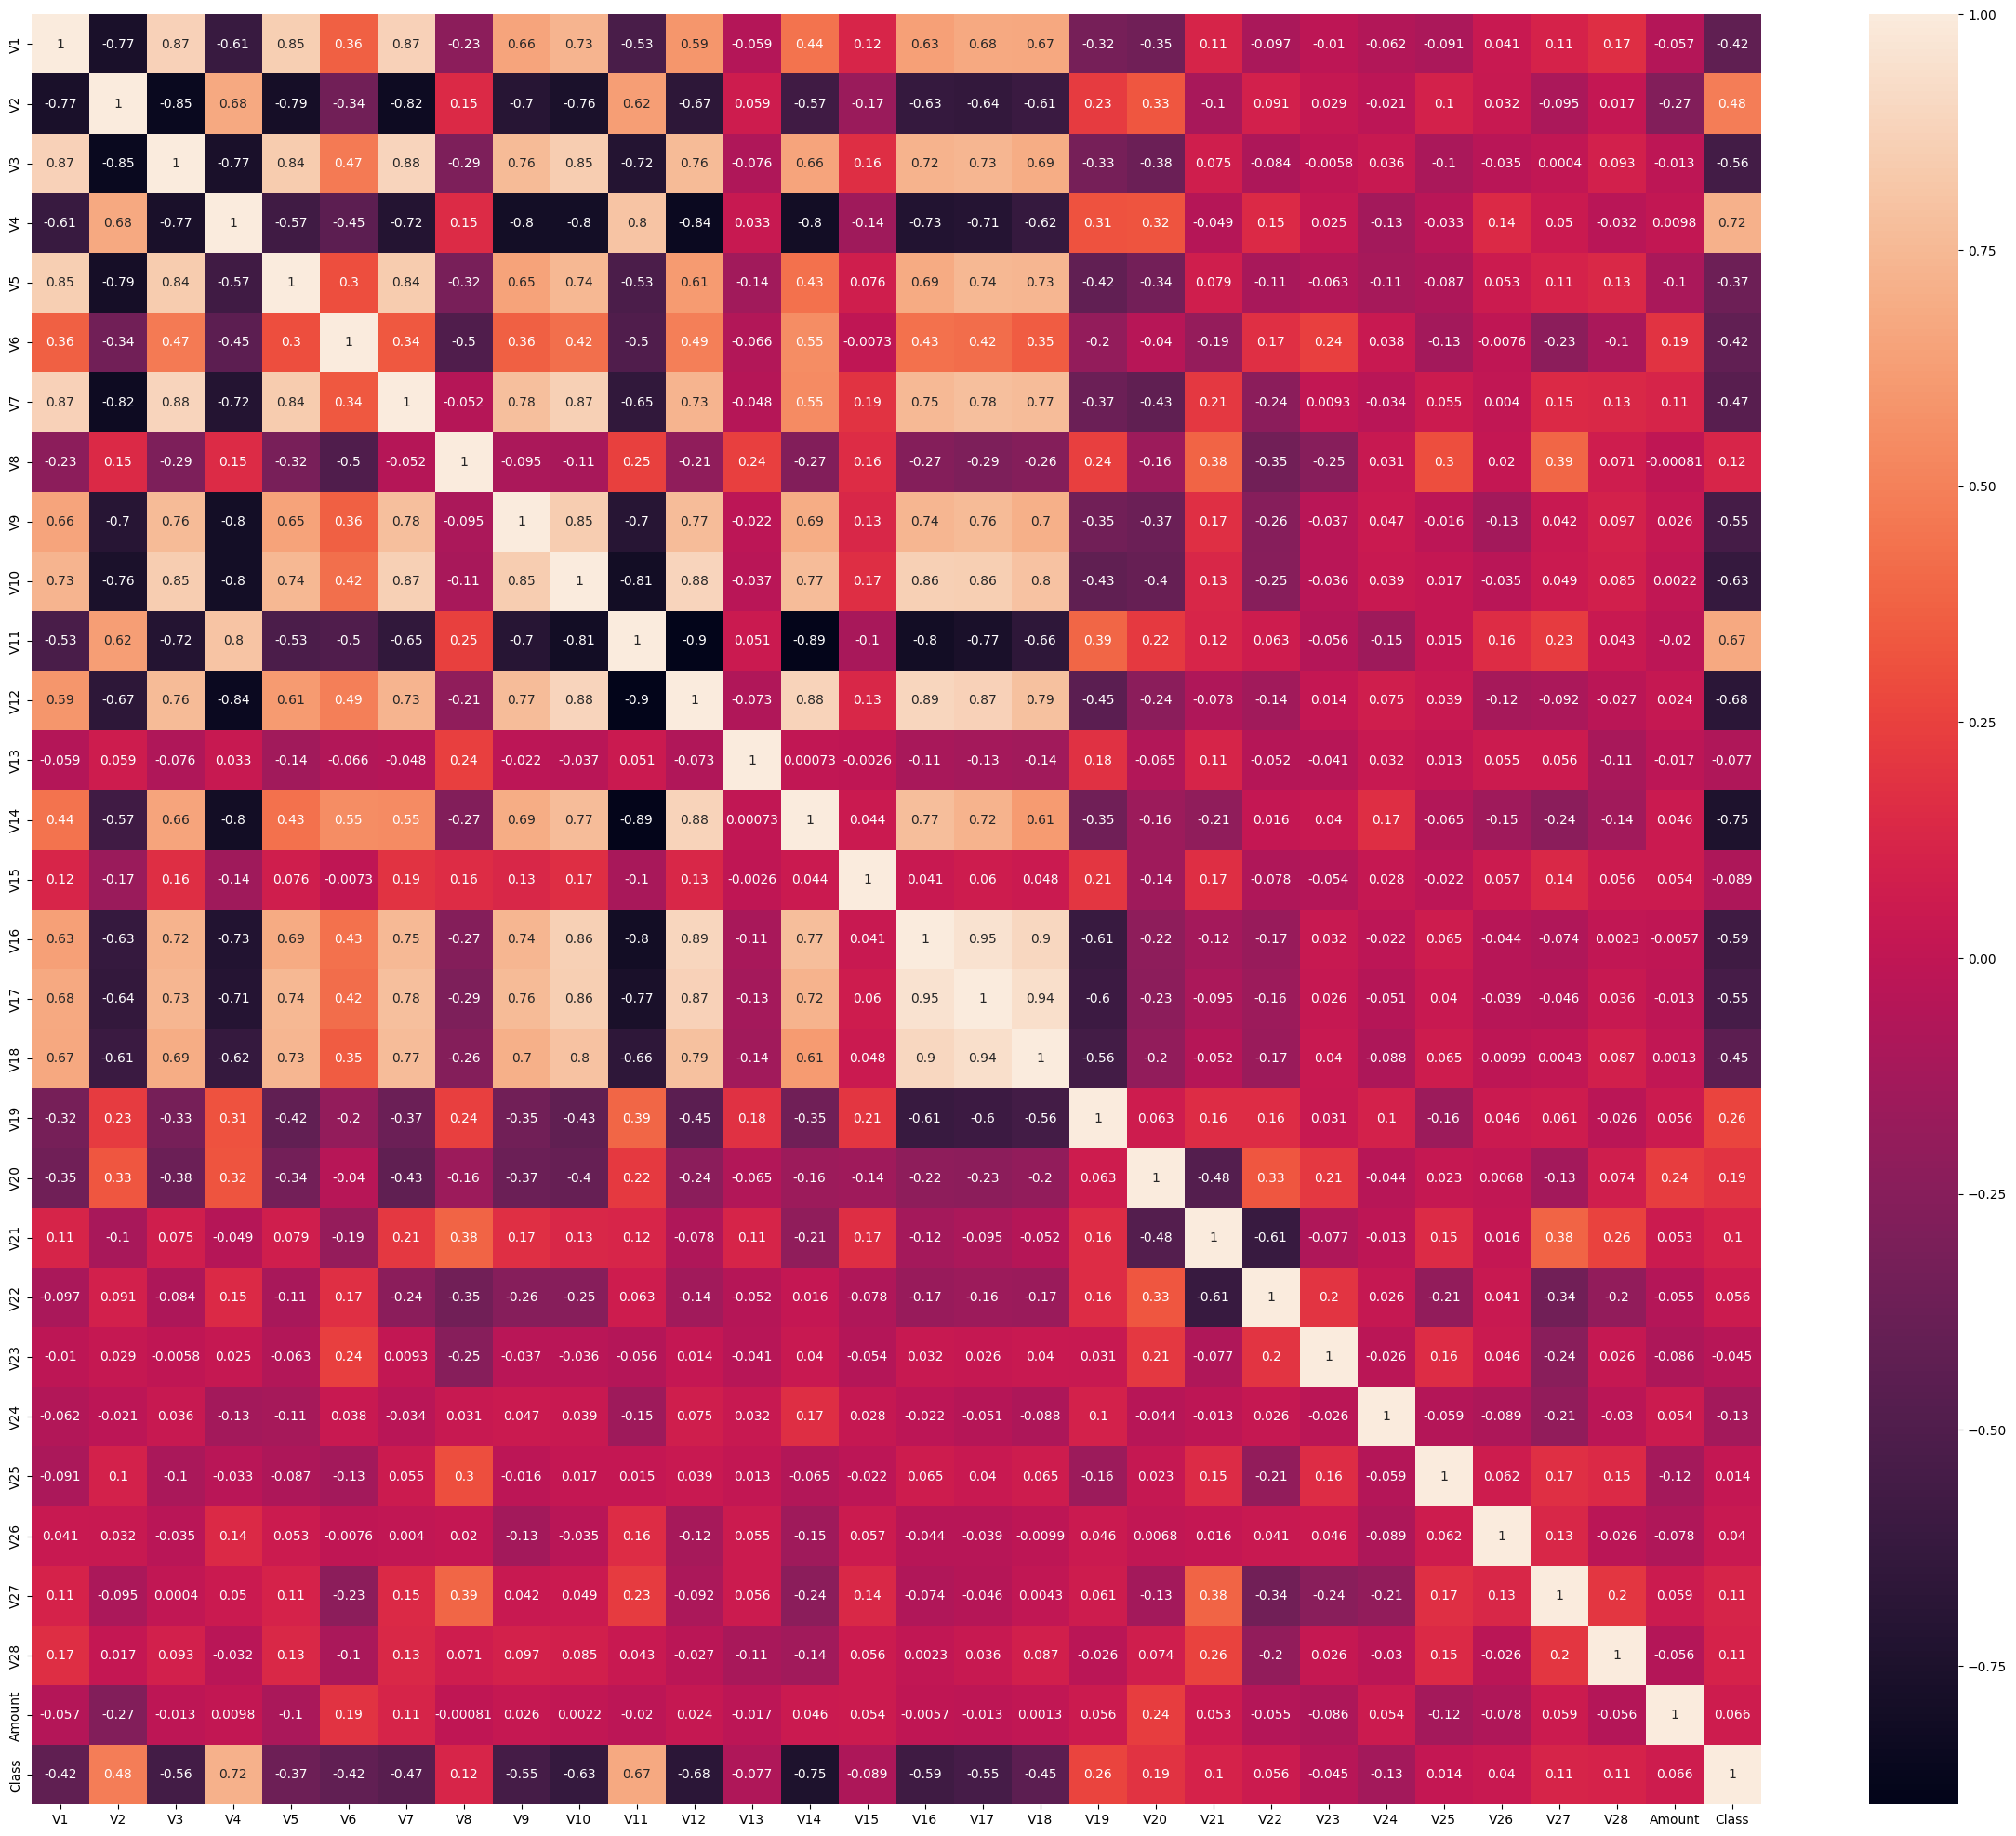

In [242]:
plt.figure(figsize=(30,25))
sns.heatmap(transaction_data.corr(),annot=True)

In [243]:
X=transaction_data.iloc[:,:-1]
y=transaction_data.iloc[:,-1]

In [244]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227830,-1.175162,1.369113,0.109272,1.475251,3.985758,4.281746,0.967982,0.677247,-2.022289,1.050899,...,-0.122981,-0.172772,-0.623689,-0.322373,0.648614,0.751219,-0.086436,-0.566562,-0.151416,0.91
41203,0.951448,-0.150201,1.535743,2.882924,-0.706849,1.156753,-0.679963,0.404276,0.387262,0.383077,...,-0.017853,-0.237569,-0.400931,-0.074169,0.037163,0.425907,-0.064499,0.049344,0.030469,60.85
129282,0.960715,-0.714997,0.903772,0.078287,-0.817470,0.651381,-0.655865,0.289803,0.830747,-0.395961,...,0.162720,-0.107786,-0.231565,-0.038662,-0.194242,0.068807,0.961641,-0.034636,0.016216,106.04
107798,-4.427674,3.723065,0.968795,-1.230213,-0.218679,-0.429865,1.319085,-1.555139,3.312631,6.117960,...,1.705824,-0.219311,0.083299,-0.057006,0.495461,-0.220730,-0.241239,-2.396850,-0.856532,0.99


In [245]:
y

541       1
623       1
4920      1
6108      1
6329      1
         ..
227830    0
41203     0
129282    0
107798    0
112427    0
Name: Class, Length: 946, dtype: int64

In [246]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(756, 29) (190, 29) (756,) (190,)


In [251]:
algorithms={'LogisticRegression':LogisticRegression(max_iter=1000),'DecisionTreeClassifier':DecisionTreeClassifier(),
            'RandomForestClassifier':RandomForestClassifier(),'SVC':SVC()}
final_score={}
for name,algorithm in algorithms.items():
  algorithm.fit(X_train,y_train)
  y_pred=algorithm.predict(X_test)
  final_score[name]=[accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),
  precision_score(y_test,y_pred),
  recall_score(y_test,y_pred),confusion_matrix(y_test,y_pred)]
print(final_score)

{'LogisticRegression': [0.968421052631579, 0.9662921348314608, 0.9555555555555556, 0.9772727272727273, array([[98,  4],
       [ 2, 86]])], 'DecisionTreeClassifier': [0.9210526315789473, 0.9180327868852459, 0.8842105263157894, 0.9545454545454546, array([[91, 11],
       [ 4, 84]])], 'RandomForestClassifier': [0.968421052631579, 0.967032967032967, 0.9361702127659575, 1.0, array([[96,  6],
       [ 0, 88]])], 'SVC': [0.8421052631578947, 0.810126582278481, 0.9142857142857143, 0.7272727272727273, array([[96,  6],
       [24, 64]])]}


In [253]:
final_metrics=pd.DataFrame(final_score).T
final_metrics.columns=['Accuracy','F1_score','Precision','Recall','Confusion_matrix']
final_metrics

,Accuracy,F1_score,Precision,Recall,Confusion_matrix
LogisticRegression,0.968421,0.966292,0.955556,0.977273,"[[98, 4], [2, 86]]"
DecisionTreeClassifier,0.921053,0.918033,0.884211,0.954545,"[[91, 11], [4, 84]]"
RandomForestClassifier,0.968421,0.967033,0.93617,1.0,"[[96, 6], [0, 88]]"
SVC,0.842105,0.810127,0.914286,0.727273,"[[96, 6], [24, 64]]"


In [ ]:
#Among all the models LogisticRegression and RandomForest outperformed.#

In [ ]:
#Weighted score of RandomForest is high compared to other models .So we can choose RandomForest.